Měření rezonanční frekvence v závislosti na prohnutí

měkké plexi: 70cm x 50 cm x 1mm 
kov: 

TODO:
klouzavý FFT
četba


$$
\frac{\partial^2}{\partial x^2}\Bigg(EI \frac{\partial^2 w}{\partial x^2} \Bigg)= - \mu \frac{\partial^2 w}{\partial t^2} + q(x)
$$

$
E ... \text{flexural modulus} \\
I ... \text{second moment of inertia} \\
D ... \text{flexural rigidity} \\
Y ... \text{Young's modulus} \\
\nu ... \text{Poisson's ratio} \\
h ... \text{shell thickness} \\
M ... \text{bending moment} \\
\kappa ... \text{curvature}
$

$$
D = EI = \frac{Y h^3}{12(1- \nu^2)} = \frac{M}{\kappa}
$$


In [4]:
import math
import matplotlib.pyplot as plt
import matplotlib.scale as mpl_sc
import numpy as np
import scipy.optimize as opt
from matplotlib.ticker import FixedLocator, NullFormatter

%matplotlib widget

def lmap(f,x):
    return list(map(f,x))

def lfilter(f,x):
    return list(filter(f,x))

$$
r = \frac{1}{\kappa} \\
l = r \cdot \arcsin{\frac{2r}{d}}
$$

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[432.64586605   0.5       ]


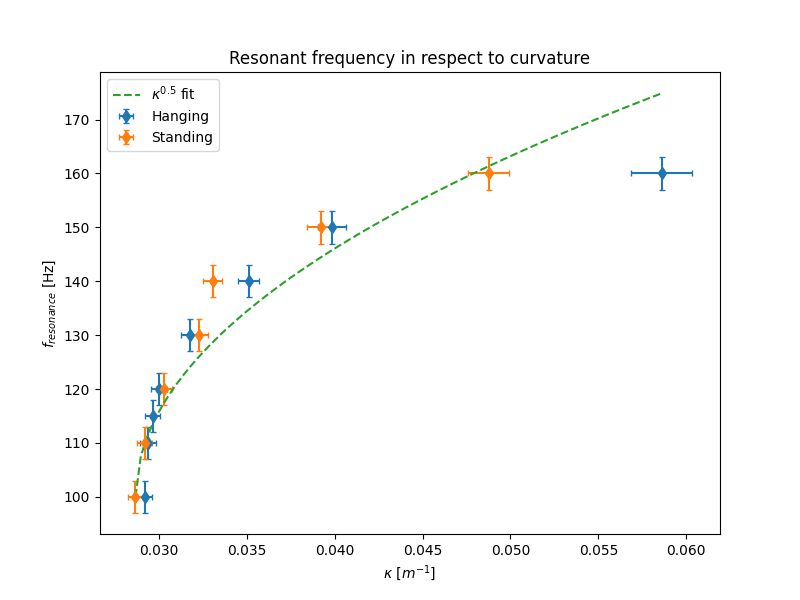

In [5]:
l = 70
ds_hang = [68.5, 68.1, 67.5, 66.7, 63.0, 57.0, 50.2, 34.1]
fs_hang = [100, 110, 115, 120, 130, 140, 150, 160]
kappas_hang = []

ds_stand = [69.8, 68.5, 66.0, 62.0, 60.5, 51.0, 41.0]
fs_stand = [100, 110, 120, 130, 140, 150, 160]
kappas_stand = []

fig, axs = plt.subplots(1, 1, figsize=(8, 6))

def get_r(l, d):
    # l = r * asin(2r/d)

    best_r = 0
    best_dev = 10000
    for r in np.linspace(0, d / 2, 1000):
        dev = r * math.asin(2 * r / d) - l

        if abs(best_dev) > abs(dev):
            best_dev = dev
            best_r = r

    return best_r

def get_k(l,d):
    return 1/get_r(l, d)

kappas_hang = lmap(lambda d: get_k(l, d), ds_hang)
kappas_stand = lmap(lambda d: get_k(l, d), ds_stand)

plt.xlabel("$\kappa$ [$m^{-1}$]")
plt.ylabel("$f_{resonance}$ [Hz]")
plt.title("Resonant frequency in respect to curvature")
plt.errorbar(
    kappas_hang,
    fs_hang,
    3,
    [
        lmap(lambda d: get_k(l, d - 1) - get_k(l, d), ds_hang),
        lmap(lambda d: get_k(l, d) - get_k(l, d + 1), ds_hang),
    ],
    label="Hanging",
    marker="d",
    linestyle="",
    capsize=2
)
plt.errorbar(
    kappas_stand,
    fs_stand,
    3,
    [
        lmap(lambda d: get_k(l, d - 1) - get_k(l, d), ds_stand),
        lmap(lambda d: get_k(l, d) - get_k(l, d + 1), ds_stand),
    ],
    label="Standing",
    marker="d",
    linestyle="",
    capsize=2
)

_min = min(kappas_hang + kappas_stand)
_max = max(kappas_hang + kappas_stand)

X = np.linspace(_min, _max, 100)
# (k, _) = opt.curve_fit(
#     lambda x, a, k: a * np.power(x - _min, k) + 100,
#     kappas_hang + kappas_stand,
#     fs_hang + fs_stand,
#     [200, 1/2.45]
# )
# Y = k[0] * np.power(X - _min, k[1]) + 100

(k, _) = opt.curve_fit(
    lambda x, a, k: a * np.power(x - _min, 0.5) + 100,
    kappas_hang + kappas_stand,
    fs_hang + fs_stand,
    [200, 0.5]
)
Y = k[0] * np.power(X - _min, 1/2) + 100

plt.plot(X, Y, "--", label="$\kappa^{" + f"{0.5:.3}" + "}$ fit")

# axs.set_xscale("function", functions=(lambda x: np.power(abs(x-_min), 1/3), lambda x: np.power(x, 3) + _min))
# plt.xlim(_min, _max)
plt.legend()

plt.savefig("./imgs/resonance_curvature.png")
print(k)

# Rychlost šíření

$
f = 5 \cdot \frac{60 fps}{75 f} = 4 Hz \\
\lambda / 2 = 0.42m \\
v_0 = 3.35 m/s
$

$
f = 3 \cdot \frac{60 fps}{24 f} = 7.5 Hz \\
\lambda / 2 = 0.33m \\
v_1 = 4.95 m/s
$


https://www.acs.psu.edu/drussell/Demos/Dispersion/Flexural.html
$$
c_L = \sqrt{\frac{E}{\rho}} \\
c_{flex}  = \sqrt{2 \pi f} \sqrt[4]{\frac{Yh^3}{12 \rho (1-\nu^2)}} = \sqrt{2 \pi f} \sqrt[4]{D} = \sqrt{2 \pi f K c_L}
$$

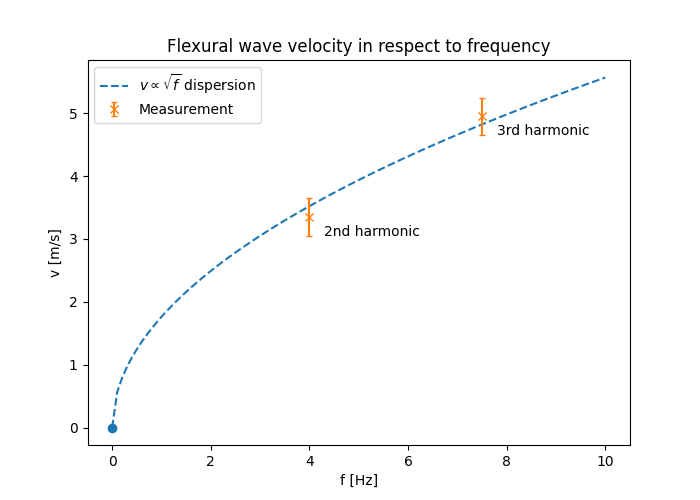

In [6]:
plt.figure(figsize=(7, 5))

xdat = [0, 4, 7.5]
ydat = [0, 3.35, 4.95]

(k, _) = opt.curve_fit(lambda f, k: k * np.sqrt(2 * math.pi * f), xdat, ydat)

E = 2.855e9
h = 1e-3
rho = 1185
nu = 0.4
k_theor = math.pow((E * h**3) / (12 * rho * (1 - nu**2)), 1 / 4)

X = np.linspace(0, 10, 100)
Y = k * np.sqrt(2 * math.pi * X)
plt.plot(X, Y, "--", label="$v \propto \sqrt{f}$ dispersion")
plt.xlabel("f [Hz]")
plt.ylabel("v [m/s]")
plt.scatter(0, 0, marker="o")
plt.errorbar(
    xdat[1:], ydat[1:], 0.3, marker="x", label="Measurement", linestyle="", capsize=2
)
plt.text(xdat[1] + 0.3, ydat[1] - 0.3, "2nd harmonic")
plt.text(xdat[2] + 0.3, ydat[2] - 0.3, "3rd harmonic")
plt.legend()

plt.title("Flexural wave velocity in respect to frequency")
plt.savefig("./imgs/flexwave_dispersion.png")